In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
from tqdm.notebook import tqdm

In [2]:
samples_4mu = [

    "4Mu_500GeV_5p0GeV_80p0mm",   
]


samples_2mu = [

    "2Mu2E_500GeV_5p0GeV_80p0mm",   
]

In [3]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v2", location_cfg="signal_v6.yaml")
fileset_2mu = utilities.make_fileset(samples_2mu, "llpNanoAOD_v2", location_cfg="signal_v6.yaml")

# fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v2", max_files=1, location_cfg="signal_v6.yaml")
# fileset_2mu = utilities.make_fileset(samples_2mu, "llpNanoAOD_v2", max_files=1, location_cfg="signal_v6.yaml")

runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=NanoAODSchema,
#    maxchunks=10,
    skipbadfiles=True
)

channels = [
    "base",
]

p = sidm_processor.SidmProcessor(
    channels,
    ["base"],
)

output_4mu = runner.run(fileset_4mu, treename="Events", processor_instance=p)
output_2mu = runner.run(fileset_2mu, treename="Events", processor_instance=p)

out_4mu = output_4mu["out"]
out_2mu = output_2mu["out"]

Output()

Output()

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: divide by zero encountered 
in divide
  result = getattr(ufunc, method)(

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in
divide
  result = getattr(ufunc, method)(

#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


Warning: a histogram with the name lj_matchedjet_pt could not be filled and will be skipped

Output()

Output()

In [5]:
samples_4mu = [

    "4Mu_500GeV_5p0GeV_80p0mm",   
]

samples_2mu = [

    "2Mu2E_500GeV_5p0GeV_80p0mm",   
]

Text(550, 2, '4Mu_500GeV_5p0GeV_80p0mm')

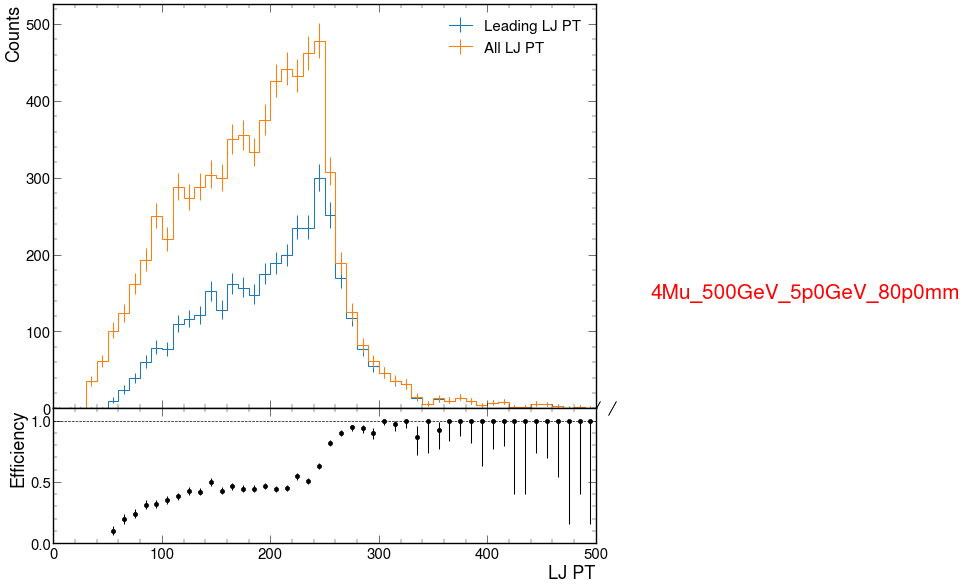

In [6]:
plt.figure(figsize=(14, 14))
out_4mu["4Mu_500GeV_5p0GeV_80p0mm"]["hists"]["lj0_pt"][channels[0], :].plot_ratio(
       out_4mu["4Mu_500GeV_5p0GeV_80p0mm"]["hists"]["lj_pt"][channels[0],:], 
       rp_num_label="Leading LJ PT",
       rp_denom_label="All LJ PT",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
plt.xlabel("LJ PT")
plt.text(550, 2, "4Mu_500GeV_5p0GeV_80p0mm", fontsize=30, color='r')

Text(550, 2, '4Mu_500GeV_5p0GeV_80p0mm')

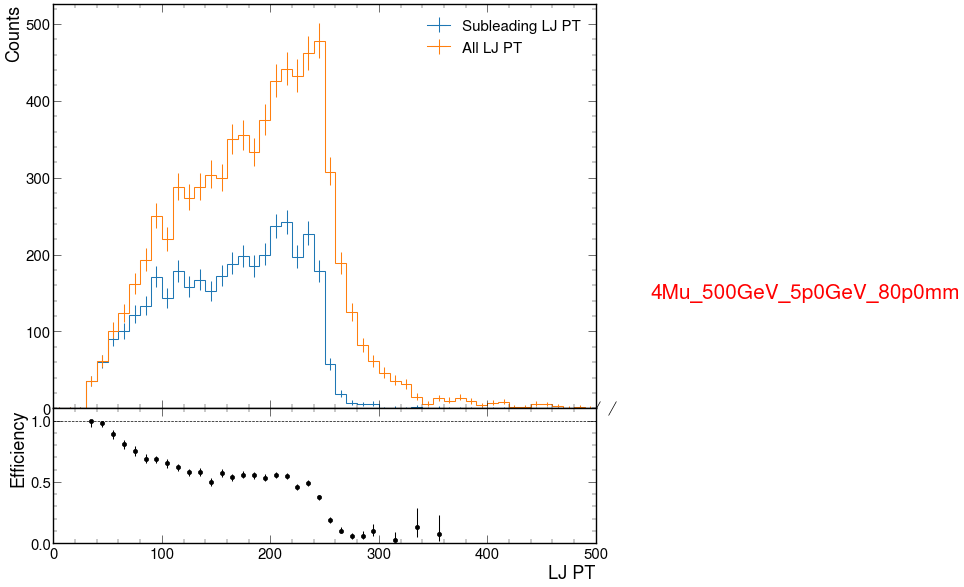

In [7]:
plt.figure(figsize=(14, 14))
out_4mu["4Mu_500GeV_5p0GeV_80p0mm"]["hists"]["lj1_pt"][channels[0], :].plot_ratio(
       out_4mu["4Mu_500GeV_5p0GeV_80p0mm"]["hists"]["lj_pt"][channels[0],:], 
       rp_num_label="Subleading LJ PT",
       rp_denom_label="All LJ PT",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
plt.xlabel("LJ PT")
plt.text(550, 2, "4Mu_500GeV_5p0GeV_80p0mm", fontsize=30, color='r')

Text(550, 2, '4Mu_500GeV_5p0GeV_80p0mm')

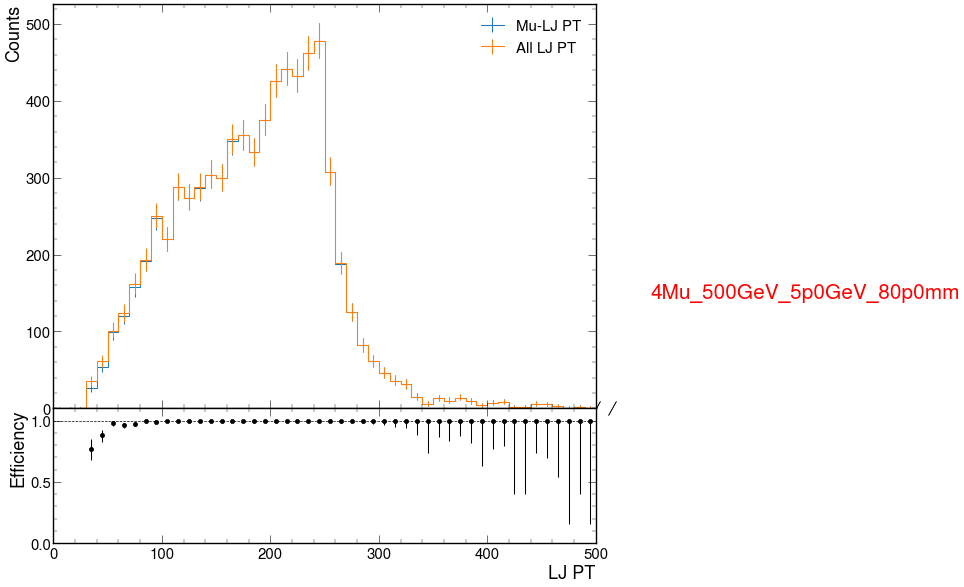

In [8]:
plt.figure(figsize=(14, 14))
out_4mu["4Mu_500GeV_5p0GeV_80p0mm"]["hists"]["mu_lj_pt"][channels[0], :].plot_ratio(
       out_4mu["4Mu_500GeV_5p0GeV_80p0mm"]["hists"]["lj_pt"][channels[0],:], 
       rp_num_label="Mu-LJ PT",
       rp_denom_label="All LJ PT",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
plt.xlabel("LJ PT")
plt.text(550, 2, "4Mu_500GeV_5p0GeV_80p0mm", fontsize=30, color='r')

Text(550, 2, '4Mu_500GeV_5p0GeV_80p0mm')

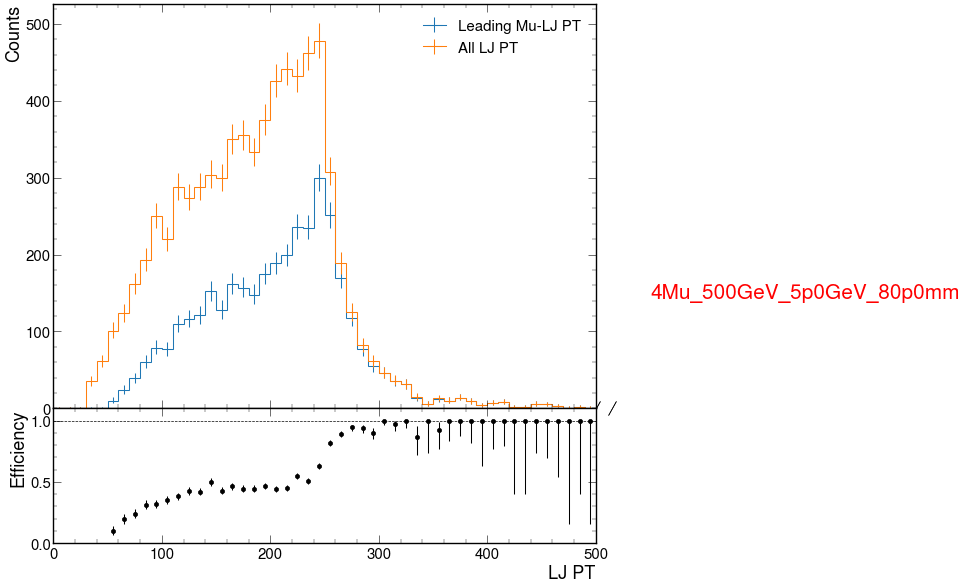

In [9]:
plt.figure(figsize=(14, 14))
out_4mu["4Mu_500GeV_5p0GeV_80p0mm"]["hists"]["leading_mu_lj_pt"][channels[0], :].plot_ratio(
       out_4mu["4Mu_500GeV_5p0GeV_80p0mm"]["hists"]["lj_pt"][channels[0],:], 
       rp_num_label="Leading Mu-LJ PT",
       rp_denom_label="All LJ PT",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
plt.xlabel("LJ PT")
plt.text(550, 2, "4Mu_500GeV_5p0GeV_80p0mm", fontsize=30, color='r')

Text(550, 2, '4Mu_500GeV_5p0GeV_80p0mm')

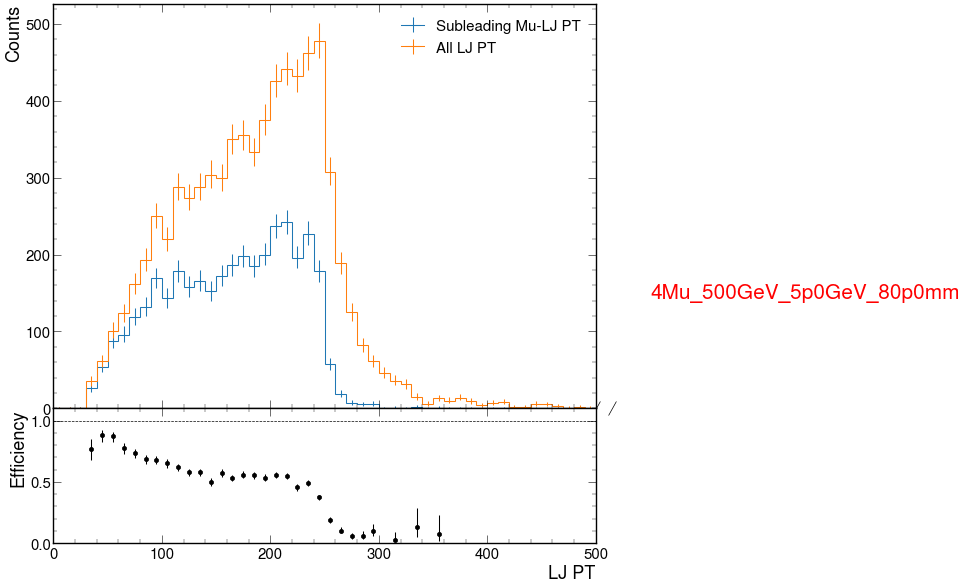

In [10]:
plt.figure(figsize=(14, 14))
out_4mu["4Mu_500GeV_5p0GeV_80p0mm"]["hists"]["subleading_mu_lj_pt"][channels[0], :].plot_ratio(
       out_4mu["4Mu_500GeV_5p0GeV_80p0mm"]["hists"]["lj_pt"][channels[0],:], 
       rp_num_label="Subleading Mu-LJ PT",
       rp_denom_label="All LJ PT",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
plt.xlabel("LJ PT")
plt.text(550, 2, "4Mu_500GeV_5p0GeV_80p0mm", fontsize=30, color='r')

Text(550, 2, '2Mu2E_500GeV_5p0GeV_80p0mm')

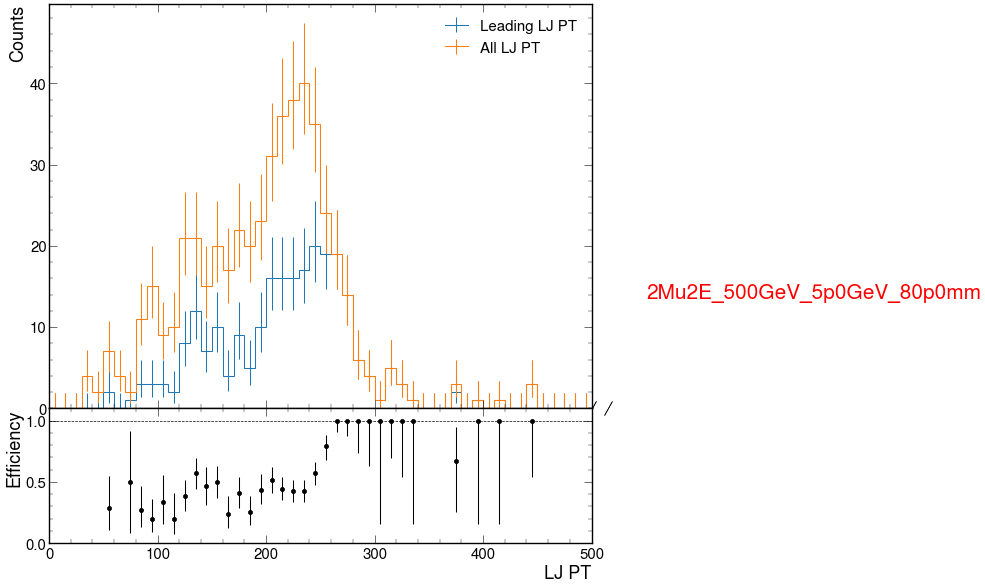

In [11]:
plt.figure(figsize=(14, 14))
out_2mu["2Mu2E_500GeV_5p0GeV_80p0mm"]["hists"]["lj0_pt"][channels[0], :].plot_ratio(
       out_2mu["2Mu2E_500GeV_5p0GeV_80p0mm"]["hists"]["lj_pt"][channels[0],:], 
       rp_num_label="Leading LJ PT",
       rp_denom_label="All LJ PT",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
plt.xlabel("LJ PT")
plt.text(550, 2, "2Mu2E_500GeV_5p0GeV_80p0mm", fontsize=30, color='r')

Text(550, 2, '2Mu2E_500GeV_5p0GeV_80p0mm')

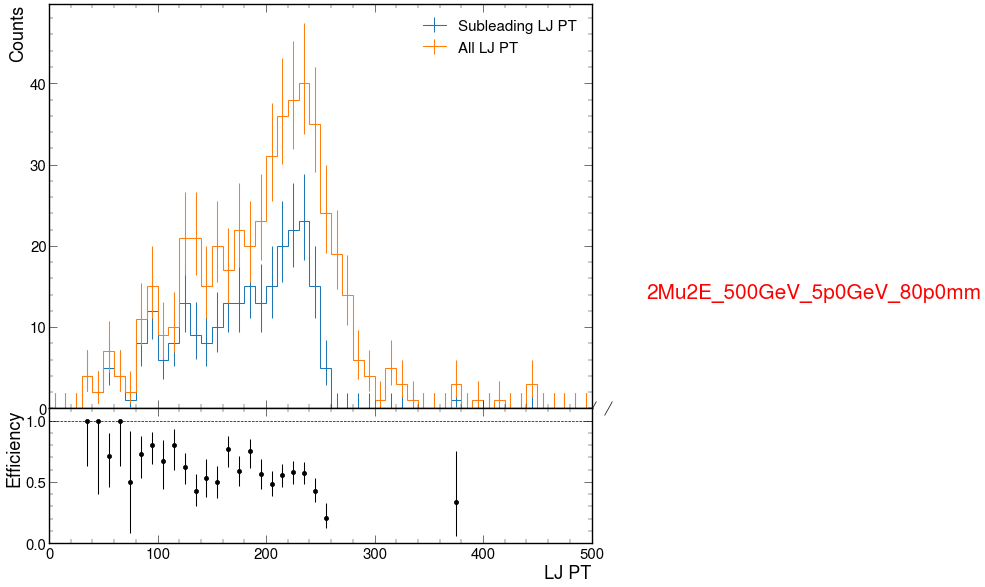

In [12]:
plt.figure(figsize=(14, 14))
out_2mu["2Mu2E_500GeV_5p0GeV_80p0mm"]["hists"]["lj1_pt"][channels[0], :].plot_ratio(
       out_2mu["2Mu2E_500GeV_5p0GeV_80p0mm"]["hists"]["lj_pt"][channels[0],:], 
       rp_num_label="Subleading LJ PT",
       rp_denom_label="All LJ PT",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
plt.xlabel("LJ PT")
plt.text(550, 2, "2Mu2E_500GeV_5p0GeV_80p0mm", fontsize=30, color='r')

Text(550, 2, '2Mu2E_500GeV_5p0GeV_80p0mm')

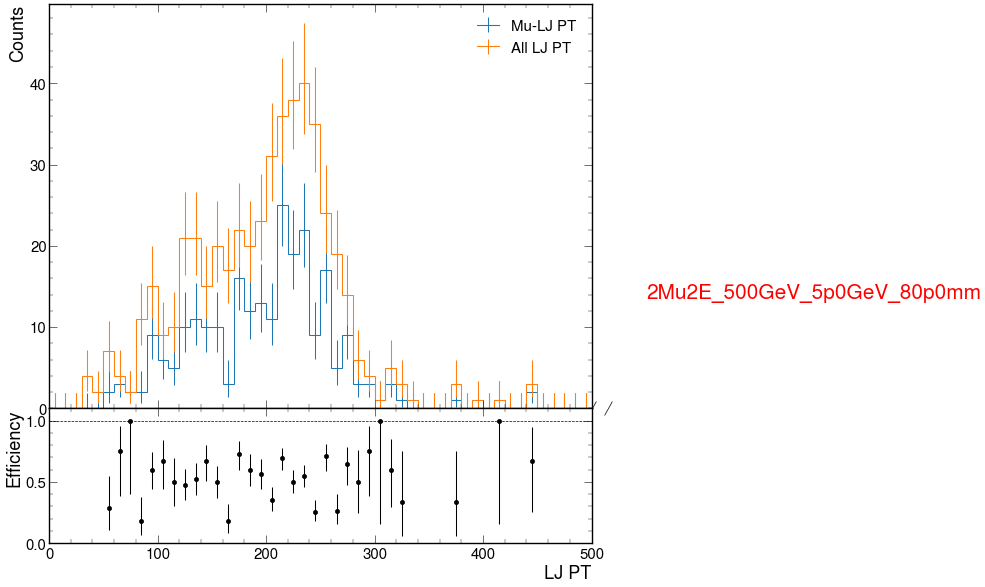

In [13]:
plt.figure(figsize=(14, 14))
out_2mu["2Mu2E_500GeV_5p0GeV_80p0mm"]["hists"]["mu_lj_pt"][channels[0], :].plot_ratio(
       out_2mu["2Mu2E_500GeV_5p0GeV_80p0mm"]["hists"]["lj_pt"][channels[0],:], 
       rp_num_label="Mu-LJ PT",
       rp_denom_label="All LJ PT",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
plt.xlabel("LJ PT")
plt.text(550, 2, "2Mu2E_500GeV_5p0GeV_80p0mm", fontsize=30, color='r')

Text(550, 2, '2Mu2E_500GeV_5p0GeV_80p0mm')

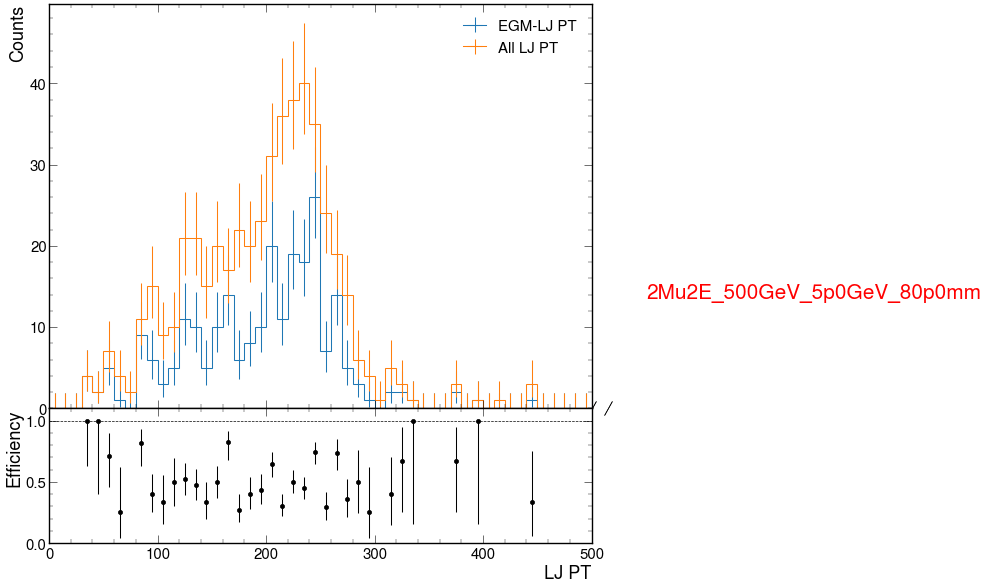

In [14]:
plt.figure(figsize=(14, 14))
out_2mu["2Mu2E_500GeV_5p0GeV_80p0mm"]["hists"]["egm_lj_pt"][channels[0], :].plot_ratio(
       out_2mu["2Mu2E_500GeV_5p0GeV_80p0mm"]["hists"]["lj_pt"][channels[0],:], 
       rp_num_label="EGM-LJ PT",
       rp_denom_label="All LJ PT",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
plt.xlabel("LJ PT")
plt.text(550, 2, "2Mu2E_500GeV_5p0GeV_80p0mm", fontsize=30, color='r')